# Desafio 2:
    League of Legends Statistics

# Desafio 2.1: Estatísticas por Campeão

    Ler a tabela no pandas.
    Calcular a média da taxa de vitória para todas as funções.
    Identificar o campeão com a maior taxa de ban.
    Criar um gráfico de barras comparando a taxa de pick de cada campeão.
    Salvar a tabela atualizada com uma nova coluna chamada "Meta", que marque campeões com Taxa de Vitória > 52% como "Sim" e os demais como "Não".



In [2]:
import pandas as pd

In [3]:
stats_per_champ = pd.read_excel('.\desafio2.1.xlsx')

In [4]:
stats_per_champ

,Campeão,Função,Taxa de Vitória (%),Taxa de Pick (%),Taxa de Ban (%)
0,Jinx,ADC,51.40,23.80,10.50
1,Yasuo,Mid,48.90,15.20,22.10
2,Amumu,Jungle,53.30,8.40,12.60
3,Malphite,Top,52.00,5.70,3.90
4,Dr. Mundo,Jungle,67.50,0.53,0.14
5,Taliyah,Mid,61.11,1.40,0.43
6,Kog'Maw,ADC,58.87,1.61,1.21
7,Hwei,Suporte,34.55,0.73,0.56
8,Rell,Suporte,56.10,5.10,4.62
9,Rakan,Suporte,54.47,6.80,0.79


# Calcular a média da taxa de vitória para todas as funções.

In [5]:
media_winrate_role = stats_per_champ.groupby('Função')['Taxa de Vitória (%)'].mean()

In [6]:
media_winrate_role

Função
ADC        55.135000
Jungle     60.400000
Mid        53.910000
Suporte    48.373333
Top        54.610000
Name: Taxa de Vitória (%), dtype: float64

# Campeão mais Banido

In [7]:
banned_rate = stats_per_champ.groupby('Campeão')['Taxa de Ban (%)'].sum()

In [8]:
most_banned_champ = banned_rate.idxmax()

In [9]:
most_banned_champ

'Viktor'

In [10]:
least_banned_champ = banned_rate.idxmin()

In [11]:
least_banned_champ

'Dr. Mundo'

# Criar um gráfico de barras comparando a taxa de pick de cada campeão

In [12]:
import matplotlib.pyplot as plt

In [13]:
pick_rates = stats_per_champ.groupby('Campeão')['Taxa de Pick (%)'].mean()

In [14]:
pick_rates

Campeão
Amumu         8.400
Dr. Mundo     0.530
Hwei          0.730
Jinx         23.800
Kog'Maw       1.610
Malphite      4.715
Rakan         6.800
Rell          5.100
Riven         7.020
Taliyah       1.400
Viktor       34.060
Yasuo        15.200
Name: Taxa de Pick (%), dtype: float64

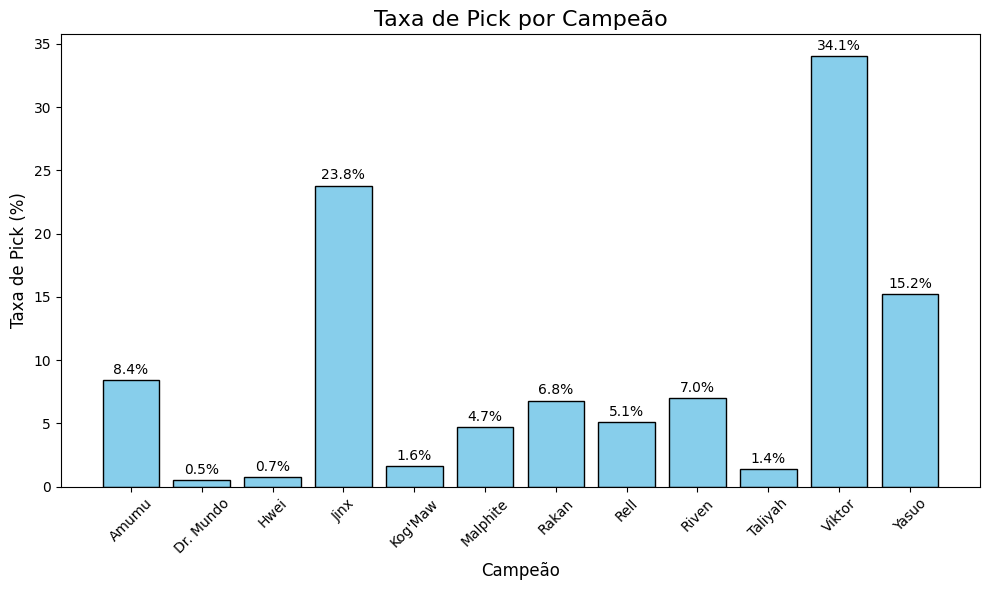

In [15]:
plt.figure(figsize=(10,6))
plt.bar(pick_rates.index,pick_rates.values, color = 'skyblue', edgecolor= 'black')

plt.title('Taxa de Pick por Campeão',fontsize= 16)
plt.xlabel('Campeão',fontsize=12)
plt.ylabel('Taxa de Pick (%)', fontsize=12)

for index, value in enumerate(pick_rates.values):
    plt.text(index, value + 0.5, f"{value:.1f}%", ha='center', fontsize=10)

plt.xticks(rotation=45)  # Rotacionar os nomes dos campeões se necessário
plt.tight_layout()

plt.show()


In [16]:
winrates = stats_per_champ.groupby('Campeão')['Taxa de Vitória (%)'].mean()

In [17]:
Meta = winrates.loc[winrates > 52]

In [18]:
Meta

Campeão
Amumu        53.30
Dr. Mundo    67.50
Kog'Maw      58.87
Malphite     54.77
Rakan        54.47
Rell         56.10
Riven        54.29
Taliyah      61.11
Name: Taxa de Vitória (%), dtype: float64

In [19]:
stats_per_champ['Meta'] = 'Não'
for i in range(len(stats_per_champ)):
    if stats_per_champ.loc[i, 'Campeão'] in Meta.index:
        stats_per_champ.loc[i, 'Meta'] = 'Sim'

In [20]:
stats_per_champ

,Campeão,Função,Taxa de Vitória (%),Taxa de Pick (%),Taxa de Ban (%),Meta
0,Jinx,ADC,51.40,23.80,10.50,Não
1,Yasuo,Mid,48.90,15.20,22.10,Não
2,Amumu,Jungle,53.30,8.40,12.60,Sim
3,Malphite,Top,52.00,5.70,3.90,Sim
4,Dr. Mundo,Jungle,67.50,0.53,0.14,Sim
5,Taliyah,Mid,61.11,1.40,0.43,Sim
6,Kog'Maw,ADC,58.87,1.61,1.21,Sim
7,Hwei,Suporte,34.55,0.73,0.56,Não
8,Rell,Suporte,56.10,5.10,4.62,Sim
9,Rakan,Suporte,54.47,6.80,0.79,Sim


In [21]:
output_file_1= 'tabela_atualizada_ex_2_1.xlsx'

stats_per_champ.to_excel(output_file_1, index= False)

# Exercício 2.2

        Desafio 2: Análise de Desempenho em Partidas
        Contexto: Você tem um arquivo desempenho_partidas.xlsx com dados de desempenho por jogador nas últimas 10 partidas:

        Tarefa:

        Calcular o KDA (Kills + Assists) / Deaths para cada linha.
        Criar um gráfico de linhas que mostre o dano total ao longo das partidas para cada jogador.
        Filtrar apenas as partidas vencidas e salvar em um novo arquivo vitorias.csv.
        Descobrir qual jogador tem o melhor KDA médio.
        Ordenar os dados por Data e Resultado (Vitórias primeiro) e salvar como desempenho_ordenado.csv.

In [22]:
performance_stats= pd.read_excel('.\desempenho_partidas.xlsx')

In [23]:
performance_stats

,Jogador,Data,Campeão,Kills,Deaths,Assists,CS,Dano Total,Resultado
0,Player1,2024-12-10,Jinx,8,4,12,200,24500,Vitória
1,Player2,2024-12-10,Yasuo,5,7,6,150,18000,Derrota
2,Player1,2024-12-09,Amumu,2,3,15,120,21000,Vitória
3,Player3,2024-12-08,Malphite,3,6,10,90,15000,Derrota


# KDA

In [24]:
kda = ((performance_stats['Kills'] + performance_stats['Assists']) / performance_stats['Deaths']).round(2)


In [25]:
kda

0    5.00
1    1.57
2    5.67
3    2.17
dtype: float64

In [26]:
performance_stats['KDA']= kda

In [27]:
performance_stats

,Jogador,Data,Campeão,Kills,Deaths,Assists,CS,Dano Total,Resultado,KDA
0,Player1,2024-12-10,Jinx,8,4,12,200,24500,Vitória,5.00
1,Player2,2024-12-10,Yasuo,5,7,6,150,18000,Derrota,1.57
2,Player1,2024-12-09,Amumu,2,3,15,120,21000,Vitória,5.67
3,Player3,2024-12-08,Malphite,3,6,10,90,15000,Derrota,2.17


# Partidas Vencidas

In [28]:
winned_matches = performance_stats[performance_stats['Resultado'] == 'Vitória']

In [29]:
winned_matches

,Jogador,Data,Campeão,Kills,Deaths,Assists,CS,Dano Total,Resultado,KDA
0,Player1,2024-12-10,Jinx,8,4,12,200,24500,Vitória,5.00
2,Player1,2024-12-09,Amumu,2,3,15,120,21000,Vitória,5.67


In [30]:
winned_matches = winned_matches.sort_values('KDA', ascending=False)

In [31]:
winned_matches

,Jogador,Data,Campeão,Kills,Deaths,Assists,CS,Dano Total,Resultado,KDA
2,Player1,2024-12-09,Amumu,2,3,15,120,21000,Vitória,5.67
0,Player1,2024-12-10,Jinx,8,4,12,200,24500,Vitória,5.00


In [32]:
output_file_2= 'vitorias.xlsx'

try:
    winned_matches.to_excel(output_file_2, index= False)
    print(f"{output_file_2} foi gerado")
except Exception as e:
    print(f"Não foi possível gerar {output_file_2}")

vitorias.xlsx foi gerado


# Criar um gráfico de linhas que mostre o dano total ao longo das partidas para cada jogador.


In [33]:
damage_per_player= performance_stats.sort_values(by=['Jogador','Data'])

In [34]:
damage_per_player

,Jogador,Data,Campeão,Kills,Deaths,Assists,CS,Dano Total,Resultado,KDA
2,Player1,2024-12-09,Amumu,2,3,15,120,21000,Vitória,5.67
0,Player1,2024-12-10,Jinx,8,4,12,200,24500,Vitória,5.00
1,Player2,2024-12-10,Yasuo,5,7,6,150,18000,Derrota,1.57
3,Player3,2024-12-08,Malphite,3,6,10,90,15000,Derrota,2.17


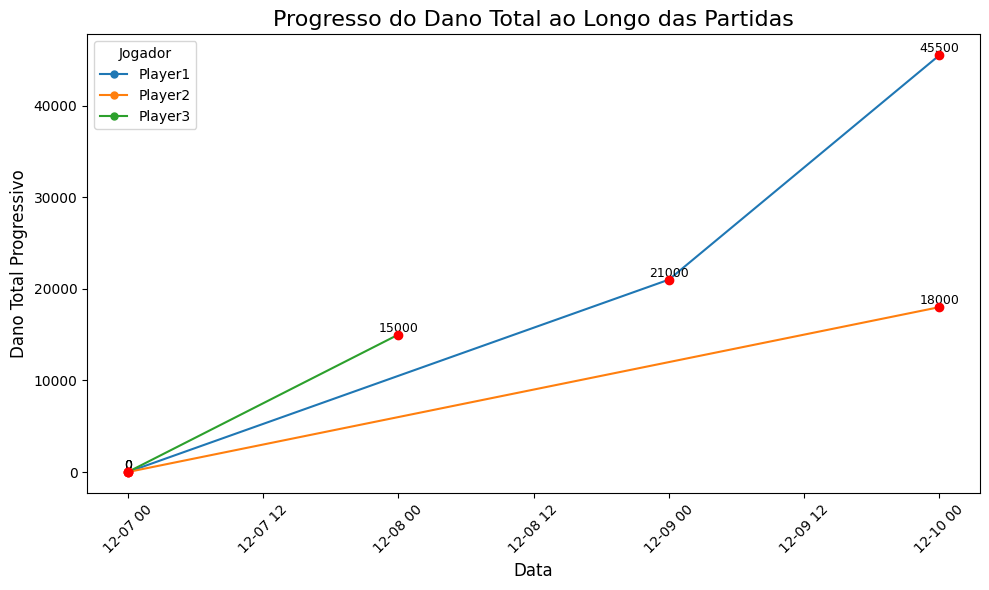

In [35]:
# Supondo que 'damage_per_player' seja o DataFrame original
damage_per_player['Data'] = pd.to_datetime(damage_per_player['Data'], errors='coerce')

# Garantir que 'Dano Total' seja numérico
damage_per_player['Dano Total'] = pd.to_numeric(damage_per_player['Dano Total'], errors='coerce')

# Remover qualquer valor nulo nas colunas 'Data' e 'Dano Total'
damage_per_player_cleaned = damage_per_player.dropna(subset=['Data', 'Dano Total'])

# Ordenar os dados por jogador e data para garantir que as partidas estejam em ordem cronológica
damage_per_player_cleaned = damage_per_player_cleaned.sort_values(by=['Jogador', 'Data'])

# Encontrar a data mínima para ser a origem comum
min_date = damage_per_player_cleaned['Data'].min()

# Criar uma submatriz com a data mínima e dano 0 para todos os jogadores, com uma data -1 dia
origin_data = pd.DataFrame({
    'Jogador': damage_per_player_cleaned['Jogador'].unique(),
    'Data': [min_date - pd.Timedelta(days=1)] * len(damage_per_player_cleaned['Jogador'].unique()),  # Data -1 dia
    'Dano Total': [0] * len(damage_per_player_cleaned['Jogador'].unique())
})

# Adicionar a origem de dano 0 para cada jogador
damage_per_player_cleaned = pd.concat([damage_per_player_cleaned, origin_data], ignore_index=True)

# Reordenar os dados por jogador e data novamente
damage_per_player_cleaned = damage_per_player_cleaned.sort_values(by=['Jogador', 'Data'])

# Inicializar o gráfico
plt.figure(figsize=(10, 6))

# Iterar sobre cada jogador único
for jogador in damage_per_player_cleaned['Jogador'].unique():
    jogador_data = damage_per_player_cleaned[damage_per_player_cleaned['Jogador'] == jogador]
    
    # Inicializar a lista de danos acumulados para esse jogador, começando com 0
    dano_acumulado = [0]  # O dano inicial é 0
    
    # Iterar sobre o dano total de cada partida, acumulando o valor
    for dano in jogador_data['Dano Total']:
        dano_acumulado.append(dano_acumulado[-1] + dano)  # Acumula o dano da partida
    
    # Plotar o gráfico com a linha de progresso, agora com mais precisão
    plt.plot(jogador_data['Data'], dano_acumulado[1:], marker='o', label=jogador, linestyle='-', markersize=5)  # Linha contínua com marcadores

    # Adicionar pontos com deslocamento de +0.5 unidades acima do dano
    for i, data in enumerate(jogador_data['Data']):
        plt.scatter(data, dano_acumulado[i + 1] + 0.5, color='red', zorder=5)  # Gerar ponto 0.5 acima do valor acumulado
        plt.text(data, dano_acumulado[i + 1] + 0.5, f'{dano_acumulado[i + 1]}', fontsize=9, color='black', ha='center', va='bottom')

# Adicionar título e rótulos aos eixos
plt.title('Progresso do Dano Total ao Longo das Partidas', fontsize=16)
plt.xlabel('Data', fontsize=12)
plt.ylabel('Dano Total Progressivo', fontsize=12)

# Adicionar legenda
plt.legend(title='Jogador')

# Ajustes no gráfico para melhor visualização
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Descobrir qual jogador tem o melhor KDA médio. 
# Ordenar os dados por Data e Resultado (Vitórias primeiro) e salvar como desempenho_ordenado.csv.

In [36]:
kda_media = performance_stats.groupby('Jogador')['KDA'].mean()

In [37]:
kda_media

Jogador
Player1    5.335
Player2    1.570
Player3    2.170
Name: KDA, dtype: float64

In [38]:
best_kda_media= kda_media.idxmax()
worst_kda_media = kda_media.idxmin()

print(f"Melhor KDA médio é: {best_kda_media}")
print(f"Pior KDA médio é: {worst_kda_media}")


Melhor KDA médio é: Player1
Pior KDA médio é: Player2


In [39]:
df_ordenado = performance_stats.sort_values(by =['Resultado', 'Data'], ascending= [False, True])

df_ordenado.to_excel('desempenho_ordenado.xlsx', index=False)


# Desafio 2.3: Análise de Rankeds
Contexto: Você tem um arquivo ranked_stats.csv com dados de desempenho agregado em partidas ranqueadas por função:

| Função   | Partidas Jogadas | Vitórias | Derrotas | CS Médio | Dano Médio |
|----------|------------------|----------|----------|----------|------------|
| Top      | 50               | 30       | 20       | 150      | 25000      |
| Jungle   | 45               | 22       | 23       | 120      | 20000      |
| Mid      | 60               | 35       | 25       | 160      | 30000      |
| ADC      | 55               | 33       | 22       | 170      | 28000      |
| Suporte  | 40               | 25       | 15       | 50       | 10000      |

Tarefa:

    Calcular a taxa de vitória (Vitórias / Partidas Jogadas) para cada função.
    Criar um gráfico de pizza que mostre a proporção de partidas jogadas por função.
    Descobrir qual função tem o maior dano médio.
    Filtrar funções com taxa de vitória acima de 55% e salvar em melhores_funcoes.csv.



In [40]:
ranked_stats = pd.read_excel(r'.\ranked_stats.xlsx')

In [41]:
ranked_stats

,Função,Partidas Jogadas,Vitórias,Derrotas,CS Médio,Dano Médio
0,Top,50,30,20,150,25000
1,Jungle,45,22,23,120,20000
2,Mid,60,35,25,160,30000
3,ADC,55,33,22,170,28000
4,Suporte,40,25,15,50,10000


In [42]:
ranked_stats['Taxa de Vitória (%)'] = round((ranked_stats['Vitórias'] / ranked_stats['Partidas Jogadas']) * 100, 1)

In [43]:
ranked_stats

,Função,Partidas Jogadas,Vitórias,Derrotas,CS Médio,Dano Médio,Taxa de Vitória (%)
0,Top,50,30,20,150,25000,60.0
1,Jungle,45,22,23,120,20000,48.9
2,Mid,60,35,25,160,30000,58.3
3,ADC,55,33,22,170,28000,60.0
4,Suporte,40,25,15,50,10000,62.5


# Gráfico de Pizza

In [44]:
games_statistics = ranked_stats.groupby('Função')['Partidas Jogadas'].mean()

In [45]:
games_statistics

Função
ADC        55.0
Jungle     45.0
Mid        60.0
Suporte    40.0
Top        50.0
Name: Partidas Jogadas, dtype: float64

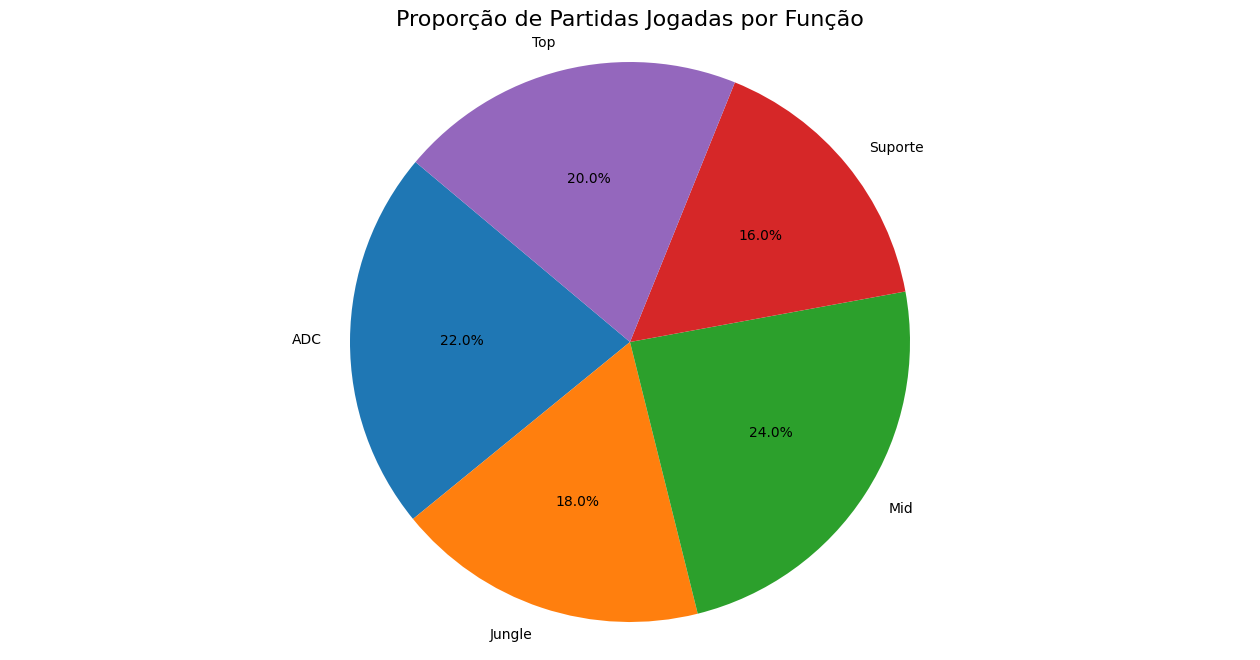

In [46]:
funcoes = games_statistics.index  # Índices (Funções)
partidas = games_statistics.values  # Valores (Partidas Jogadas)

plt.figure(figsize=(16, 8))
plt.pie(partidas, labels=funcoes, autopct='%1.1f%%', startangle=140, colors=plt.cm.tab10.colors)

# Configurações adicionais
plt.title('Proporção de Partidas Jogadas por Função', fontsize=16)
plt.axis('equal')  # Garantir que o gráfico seja um círculo
plt.show()

# Descobrir qual função tem o maior dano médio.
    

In [56]:
damage_func = ranked_stats.groupby('Função')['Dano Médio'].mean()

In [57]:
damage_func

Função
ADC        28000.0
Jungle     20000.0
Mid        30000.0
Suporte    10000.0
Top        25000.0
Name: Dano Médio, dtype: float64

In [61]:
greatest_damage_func = damage_func.idxmax()
greatest_damage_value = damage_func.max()

smallest_damage_func = damage_func.idxmin()
smallest_damage_value = damage_func.min()

In [62]:
print(f"The function that does the greatest amount of damage is {greatest_damage_func} which is {greatest_damage_value}")
print(f"The function that does the smallest amount of damage is {smallest_damage_func} which is {smallest_damage_value}")

The function that does the greatest amount of damage is Mid which is 30000.0
The function that does the smallest amount of damage is Suporte which is 10000.0


#     Filtrar funções com taxa de vitória acima de 55% e salvar em melhores_funcoes.csv.


In [66]:
winrate_above_55 = ranked_stats[ranked_stats['Taxa de Vitória (%)'] >= 55]

In [67]:
winrate_above_55

,Função,Partidas Jogadas,Vitórias,Derrotas,CS Médio,Dano Médio,Taxa de Vitória (%)
0,Top,50,30,20,150,25000,60.0
2,Mid,60,35,25,160,30000,58.3
3,ADC,55,33,22,170,28000,60.0
4,Suporte,40,25,15,50,10000,62.5


In [69]:
output_file_3 = 'melhores_funcoes.xlsx'

winrate_above_55.to_excel(output_file_3, index= False)

# Desafio 4: Análise de Campeões Jogados
Contexto: Você está interessado em saber como a frequência de campeões jogados varia ao longo do tempo. Você tem um arquivo campeoes_jogados.csv com dados semanais:

| Semana       | Jinx | Yasuo | Amumu | Malphite | Total |
|--------------|------|-------|-------|----------|-------|
| 2024-12-01   | 20   | 15    | 5     | 10       | 50    |
| 2024-12-08   | 30   | 10    | 8     | 12       | 60    |
| 2024-12-15   | 25   | 20    | 10    | 15       | 70    |


Tarefa:

    Calcular a média semanal de jogos por campeão.
    Criar um gráfico de linha para cada campeão mostrando a variação semanal.
    Descobrir qual campeão teve o maior aumento percentual em jogos de uma semana para a outra.
    Adicionar uma coluna "Proporção" que mostre a porcentagem de jogos de cada campeão em relação ao total da semana.

In [70]:
played_champions = pd.read_excel('campeoes_jogados.xlsx')

In [71]:
played_champions

,Semana,Jinx,Yasuo,Amumu,Malphite,Total
0,2024-12-01,20,15,5,10,50
1,2024-12-08,30,10,8,12,60
2,2024-12-15,25,20,10,15,70


In [77]:
mean_weekly =  played_champions.drop(columns = ['Semana']).mean().round(2)

In [78]:
mean_weekly

Jinx        25.00
Yasuo       15.00
Amumu        7.67
Malphite    12.33
Total       60.00
dtype: float64

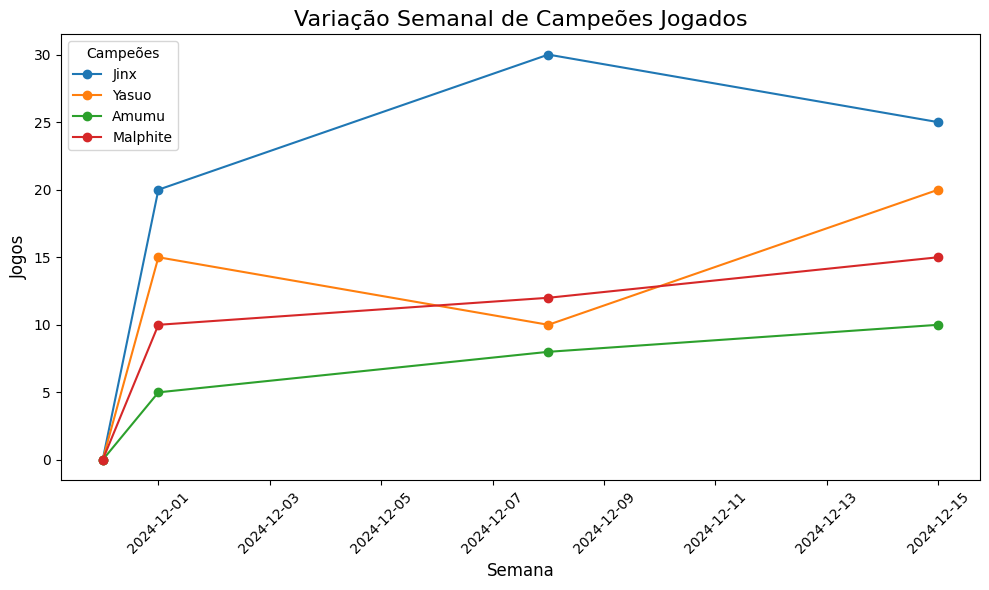

In [80]:
from datetime import timedelta

played_champions["Semana"] = pd.to_datetime(played_champions["Semana"])

# Adicionar um ponto inicial: Data mínima - 1 dia
data_min = played_champions["Semana"].min() - timedelta(days=1)
new_row = pd.Series({"Semana": data_min, "Jinx": 0, "Yasuo": 0, "Amumu": 0, "Malphite": 0, "Total": 0})
played_champions = pd.concat([pd.DataFrame([new_row]), played_champions], ignore_index=True)

# Criar gráfico de linha
plt.figure(figsize=(10, 6))

# Iterar sobre os campeões (colunas, excluindo 'Semana' e 'Total')
for champion in played_champions.columns[1:-1]:
    plt.plot(played_champions["Semana"], played_champions[champion], marker="o", label=champion)

# Adicionar título e rótulos
plt.title("Variação Semanal de Campeões Jogados", fontsize=16)
plt.xlabel("Semana", fontsize=12)
plt.ylabel("Jogos", fontsize=12)

# Ajustar datas no eixo X
plt.xticks(rotation=45)

# Adicionar legenda
plt.legend(title="Campeões")

# Mostrar o gráfico
plt.tight_layout()
plt.show()